<a href="https://colab.research.google.com/github/GhosterUser31/DavidAngel/blob/main/Upside_down_Diffusion-fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Upside-down Diffusion 1𝗣𝗿𝗼𝗺𝗽𝘁 𝗳𝘂𝘀𝗲𝗱 2𝗣𝗿𝗼𝗺𝗽𝘁 😱** 🔄 🎨

Create beautiful upside-down illusions using Stable Diffusion XL!

Created by [𝗕𝘆𝗛𝗮𝗰𝗸𝗲𝗿](https://twitter.com/𝗻𝘂𝗹𝗹) (@𝗣𝘆𝗣𝘆). Tag me on Twitter, I'll share your creations!

![](https://w0.peakpx.com/wallpaper/615/442/HD-wallpaper-joker-anonymous-hacker.jpg)

### Setup

First, please make sure you are using a GPU runtime to run this notebook, so inference is much faster. If the following command fails, use the `Runtime` menu above and select `Change runtime type`.

In [ ]:
!nvidia-smi

Mon Sep 18 21:10:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Next, you should install `diffusers` as well as `transformers`. `accelerate` is used to achieve much faster loading.

In [1]:

from IPython.display import HTML, display

# CSS para texto animado y fondo personalizado
style = """
<style>
body {
    background: url('https://i.pinimg.com/736x/70/d2/2b/70d22b40744b93c1db7ba694bdb7c0da.jpg') no-repeat center center fixed;
    background-size: cover;
    color: #39ff14;
    font-family: Consolas, monospace;
}

@keyframes neon-border {
    0%, 100% {
        box-shadow: 0 0 5px #39ff14, 0 0 10px #39ff14, 0 0 20px #39ff14, 0 0 40px #39ff14;
    }
    50% {
        box-shadow: 0 0 10px #00ff00, 0 0 30px #00ff00, 0 0 50px #00ff00, 0 0 70px #00ff00;
    }
}

.neon-text {
    font-size: 1.2rem;
    color: #39ff14;
    text-shadow: 0 0 5px #39ff14, 0 0 10px #39ff14, 0 0 20px #39ff14;
    border: 2px solid #39ff14;
    border-radius: 10px;
    padding: 10px;
    animation: neon-border 2s infinite;
    display: inline-block;
    margin: 10px 0;
    background-color: rgba(0, 0, 0, 0.5); /* Fondo semitransparente */
}
</style>
"""

# Mostrar el estilo con el fondo
display(HTML(style))

# Función para mostrar texto animado
def neon_output(text):
    display(HTML(f'<div class="neon-text">{text}</div>'))

# Mostrar mensaje inicial
neon_output("🚀 Iniciando instalación de dependencias... Esto puede tomar un tiempo.")

# Código para instalar las dependencias
!pip install --upgrade pip

neon_output("📦 Actualizando pip...")

!pip install --no-cache-dir --prefer-binary \
    diffusers==0.21.1 \
    transformers==4.33.2 \
    accelerate==0.23.0 \
    filelock==3.12.2 \
    huggingface-hub==0.17.2 \
    numpy==1.23.5 \
    packaging==23.1 \
    pyyaml==6.0.1 \
    regex==2023.6.3 \
    requests==2.31.0 \
    tokenizers==0.13.3 \
    safetensors==0.3.3 \
    tqdm==4.66.1 \
    psutil==5.9.5 \
    fsspec==2023.6.0 \
    typing-extensions==4.5.0 \
    sympy==1.12 \
    networkx==3.1 \
    jinja2==3.1.2 \
    triton==2.0.0 \
    cmake==3.27.4.1 \
    lit==16.0.6 \
    charset-normalizer==3.2.0 \
    idna==3.4 \
    urllib3==2.0.4 \
    certifi==2023.7.22 \
    MarkupSafe==2.1.3 \
    mpmath==1.3.0

neon_output("✅ Instalación completada exitosamente. ¡Todo listo para continuar!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 187.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 195.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Imports and loading

Stable Diffusion XL is fairly heavy. This will take about 2 minutes to download & load.

In [1]:
from diffusers import StableDiffusionXLPipeline
from diffusers.pipelines.stable_diffusion_xl import StableDiffusionXLPipelineOutput
from typing import Any, Callable, Dict, List, Optional, Tuple, Union
import torch
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [2]:

from IPython.display import HTML, display

# CSS para texto animado y fondo personalizado
style = """
<style>
body {
    background: url('https://w0.peakpx.com/wallpaper/332/743/HD-wallpaper-anonymous-mask-roses-flowers-dark.jpg') no-repeat center center fixed;
    background-size: cover;
    color: #39ff14;
    font-family: Consolas, monospace;
}

@keyframes neon-border {
    0%, 100% {
        box-shadow: 0 0 5px #39ff14, 0 0 10px #39ff14, 0 0 20px #39ff14, 0 0 40px #39ff14;
    }
    50% {
        box-shadow: 0 0 10px #00ff00, 0 0 20px #00ff00, 0 0 30px #00ff00, 0 0 50px #00ff00;
    }
}

.neon-text {
    font-size: 1.5rem;
    color: #39ff14;
    text-shadow: 0 0 5px #39ff14, 0 0 10px #39ff14, 0 0 20px #39ff14;
    border: 2px solid #39ff14;
    border-radius: 10px;
    padding: 10px;
    animation: neon-border 2s infinite;
    display: inline-block;
    margin: 10px 0;
    background-color: rgba(0, 0, 0, 0.5); /* Fondo semitransparente */
}
</style>
"""

# Mostrar el estilo con el fondo
display(HTML(style))

# Función para mostrar texto animado
def neon_output(text):
    display(HTML(f'<div class="neon-text">{text}</div>'))

# Ejemplo de uso con texto animado
neon_output("🚀 Cargando el modelo... Esto puede tomar un tiempo. Por favor espera.")

# Código para cargar el modelo
from diffusers import StableDiffusionXLPipeline
import torch

print("Preparando el modelo...")
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variants="fp16",
    use_safetensor=True,
)
pipe.to("cuda")

# Mostrar texto animado cuando el modelo esté listo
neon_output("✅ Modelo cargado exitosamente. ¡Listo para generar!")

Preparando el modelo...


Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Keyword arguments {'variants': 'fp16', 'use_safetensor': True} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### Modified diffusion process

In [3]:
@torch.no_grad()
def call(
        pipe,
        prompt: Union[str, List[str]] = None,
        prompt2: Union[str, List[str]] = None,
        height: Optional[int] = None,
        width: Optional[int] = None,
        num_inference_steps: int = 50,
        denoising_end: Optional[float] = None,
        guidance_scale: float = 5.0,
        guidance_scale2: float = 5.0,
        negative_prompt: Optional[Union[str, List[str]]] = None,
        negative_prompt2: Optional[Union[str, List[str]]] = None,
        num_images_per_prompt: Optional[int] = 1,
        eta: float = 0.0,
        generator: Optional[Union[torch.Generator, List[torch.Generator]]] = None,
        latents: Optional[torch.FloatTensor] = None,
        prompt_embeds: Optional[torch.FloatTensor] = None,
        negative_prompt_embeds: Optional[torch.FloatTensor] = None,
        pooled_prompt_embeds: Optional[torch.FloatTensor] = None,
        negative_pooled_prompt_embeds: Optional[torch.FloatTensor] = None,
        output_type: Optional[str] = "pil",
        return_dict: bool = True,
        callback: Optional[Callable[[int, int, torch.FloatTensor], None]] = None,
        callback_steps: int = 1,
        cross_attention_kwargs: Optional[Dict[str, Any]] = None,
        guidance_rescale: float = 0.0,
        original_size: Optional[Tuple[int, int]] = None,
        crops_coords_top_left: Tuple[int, int] = (0, 0),
        target_size: Optional[Tuple[int, int]] = None,
        negative_original_size: Optional[Tuple[int, int]] = None,
        negative_crops_coords_top_left: Tuple[int, int] = (0, 0),
        negative_target_size: Optional[Tuple[int, int]] = None,
    ):
        # 0. Default height and width to unet
        height = height or pipe.default_sample_size * pipe.vae_scale_factor
        width = width or pipe.default_sample_size * pipe.vae_scale_factor

        original_size = original_size or (height, width)
        target_size = target_size or (height, width)

        # 1. Check inputs. Raise error if not correct
        pipe.check_inputs(
            prompt,
            None,
            height,
            width,
            callback_steps,
            negative_prompt,
            None,
            prompt_embeds,
            negative_prompt_embeds,
            pooled_prompt_embeds,
            negative_pooled_prompt_embeds,
        )

        # 2. Define call parameters
        if prompt is not None and isinstance(prompt, str):
            batch_size = 1
        elif prompt is not None and isinstance(prompt, list):
            batch_size = len(prompt)
        else:
            batch_size = prompt_embeds.shape[0]

        device = pipe._execution_device

        # here `guidance_scale` is defined analog to the guidance weight `w` of equation (2)
        # of the Imagen paper: https://arxiv.org/pdf/2205.11487.pdf . `guidance_scale = 1`
        # corresponds to doing no classifier free guidance.
        do_classifier_free_guidance = guidance_scale > 1.0

        # 3. Encode input prompt
        text_encoder_lora_scale = (
            cross_attention_kwargs.get("scale", None) if cross_attention_kwargs is not None else None
        )

        (
            prompt_embeds,
            negative_prompt_embeds,
            pooled_prompt_embeds,
            negative_pooled_prompt_embeds,
        ) = pipe.encode_prompt(
            prompt=prompt,
            device=device,
            num_images_per_prompt=num_images_per_prompt,
            do_classifier_free_guidance=do_classifier_free_guidance,
            negative_prompt=negative_prompt,
            prompt_embeds=None,
            negative_prompt_embeds=None,
            pooled_prompt_embeds=None,
            negative_pooled_prompt_embeds=None,
            lora_scale=text_encoder_lora_scale,
        )

        (
            prompt2_embeds,
            negative_prompt2_embeds,
            pooled_prompt2_embeds,
            negative_pooled_prompt2_embeds,
        ) = pipe.encode_prompt(
            prompt=prompt2,
            device=device,
            num_images_per_prompt=num_images_per_prompt,
            do_classifier_free_guidance=do_classifier_free_guidance,
            negative_prompt=negative_prompt2,
            prompt_embeds=None,
            negative_prompt_embeds=None,
            pooled_prompt_embeds=None,
            negative_pooled_prompt_embeds=None,
            lora_scale=text_encoder_lora_scale,
        )

        # 4. Prepare timesteps
        pipe.scheduler.set_timesteps(num_inference_steps, device=device)

        timesteps = pipe.scheduler.timesteps

        # 5. Prepare latent variables
        num_channels_latents = pipe.unet.config.in_channels
        latents = pipe.prepare_latents(
            batch_size * num_images_per_prompt,
            num_channels_latents,
            height,
            width,
            prompt_embeds.dtype,
            device,
            generator,
            latents,
        )

        # 6. Prepare extra step kwargs. TODO: Logic should ideally just be moved out of the pipeline
        extra_step_kwargs = pipe.prepare_extra_step_kwargs(generator, eta)

        # 7. Prepare added time ids & embeddings
        add_text_embeds = pooled_prompt_embeds
        add_text2_embeds = pooled_prompt2_embeds

        add_time_ids = pipe._get_add_time_ids(
            original_size, crops_coords_top_left, target_size, dtype=prompt_embeds.dtype
        )
        add_time2_ids = pipe._get_add_time_ids(
            original_size, crops_coords_top_left, target_size, dtype=prompt2_embeds.dtype
        )

        if negative_original_size is not None and negative_target_size is not None:
            negative_add_time_ids = pipe._get_add_time_ids(
                negative_original_size,
                negative_crops_coords_top_left,
                negative_target_size,
                dtype=prompt_embeds.dtype,
            )
        else:
            negative_add_time_ids = add_time_ids
            negative_add_time2_ids = add_time2_ids

        if do_classifier_free_guidance:
            prompt_embeds = torch.cat([negative_prompt_embeds, prompt_embeds], dim=0)
            add_text_embeds = torch.cat([negative_pooled_prompt_embeds, add_text_embeds], dim=0)
            add_time_ids = torch.cat([negative_add_time_ids, add_time_ids], dim=0)

            prompt2_embeds = torch.cat([negative_prompt2_embeds, prompt2_embeds], dim=0)
            add_text2_embeds = torch.cat([negative_pooled_prompt2_embeds, add_text2_embeds], dim=0)
            add_time2_ids = torch.cat([negative_add_time2_ids, add_time2_ids], dim=0)

        prompt_embeds = prompt_embeds.to(device)
        add_text_embeds = add_text_embeds.to(device)
        add_time_ids = add_time_ids.to(device).repeat(batch_size * num_images_per_prompt, 1)

        prompt2_embeds = prompt2_embeds.to(device)
        add_text2_embeds = add_text2_embeds.to(device)
        add_time2_ids = add_time2_ids.to(device).repeat(batch_size * num_images_per_prompt, 1)

        # 8. Denoising loop
        num_warmup_steps = max(len(timesteps) - num_inference_steps * pipe.scheduler.order, 0)

        # 7.1 Apply denoising_end
        if denoising_end is not None and isinstance(denoising_end, float) and denoising_end > 0 and denoising_end < 1:
            discrete_timestep_cutoff = int(
                round(
                    pipe.scheduler.config.num_train_timesteps
                    - (denoising_end * pipe.scheduler.config.num_train_timesteps)
                )
            )
            num_inference_steps = len(list(filter(lambda ts: ts >= discrete_timestep_cutoff, timesteps)))
            timesteps = timesteps[:num_inference_steps]

        with pipe.progress_bar(total=num_inference_steps) as progress_bar:
            for i, t in enumerate(timesteps):
                if i % 2 == 0:
                  # expand the latents if we are doing classifier free guidance
                  latent_model_input = torch.cat([latents] * 2) if do_classifier_free_guidance else latents

                  latent_model_input = pipe.scheduler.scale_model_input(latent_model_input, t)

                  # predict the noise residual
                  added_cond_kwargs = {"text_embeds": add_text_embeds, "time_ids": add_time_ids}
                  noise_pred = pipe.unet(
                      latent_model_input,
                      t,
                      encoder_hidden_states=prompt_embeds,
                      cross_attention_kwargs=cross_attention_kwargs,
                      added_cond_kwargs=added_cond_kwargs,
                      return_dict=False,
                  )[0]

                  # perform guidance
                  if do_classifier_free_guidance:
                      noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
                      noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)
                else:
                  # expand the latents if we are doing classifier free guidance
                  latent_model_input2 = torch.cat([latents.flip(2)] * 2) if do_classifier_free_guidance else latents
                  latent_model_input2 = pipe.scheduler.scale_model_input(latent_model_input2, t)

                  # predict the noise residual
                  added_cond2_kwargs = {"text_embeds": add_text2_embeds, "time_ids": add_time2_ids}
                  noise_pred2 = pipe.unet(
                      latent_model_input2,
                      t,
                      encoder_hidden_states=prompt2_embeds,
                      cross_attention_kwargs=cross_attention_kwargs,
                      added_cond_kwargs=added_cond2_kwargs,
                      return_dict=False,
                  )[0]

                  # perform guidance
                  if do_classifier_free_guidance:
                      noise_pred2_uncond, noise_pred2_text = noise_pred2.chunk(2)
                      noise_pred2 = noise_pred2_uncond + guidance_scale2 * (noise_pred2_text - noise_pred2_uncond)

                noise_pred = noise_pred if i % 2 == 0 else noise_pred2.flip(2)

                # compute the previous noisy sample x_t -> x_t-1
                latents = pipe.scheduler.step(noise_pred, t, latents, **extra_step_kwargs, return_dict=False)[0]

                # call the callback, if provided
                if i == len(timesteps) - 1 or ((i + 1) > num_warmup_steps and (i + 1) % pipe.scheduler.order == 0):
                    progress_bar.update()
                    if callback is not None and i % callback_steps == 0:
                        callback(i, t, latents)

        if not output_type == "latent":
            # make sure the VAE is in float32 mode, as it overflows in float16
            needs_upcasting = pipe.vae.dtype == torch.float16 and pipe.vae.config.force_upcast

            if needs_upcasting:
                pipe.upcast_vae()
                latents = latents.to(next(iter(pipe.vae.post_quant_conv.parameters())).dtype)

            image = pipe.vae.decode(latents / pipe.vae.config.scaling_factor, return_dict=False)[0]

            # cast back to fp16 if needed
            if needs_upcasting:
                pipe.vae.to(dtype=torch.float16)
        else:
            image = latents

        if not output_type == "latent":
            # apply watermark if available
            if pipe.watermark is not None:
                image = pipe.watermark.apply_watermark(image)

            image = pipe.image_processor.postprocess(image, output_type=output_type)

        # Offload all models
        pipe.maybe_free_model_hooks()

        if not return_dict:
            return (image,)

        return StableDiffusionXLPipelineOutput(images=image)

### We're ready to generate some illusions!

The image will generate in about a 30 seconds with a (free) T4 GPU.

`prompt1` is the prompt for the normal image.

`prompt2` is the prompt for the image when seen upside-down.

You can increase `guidance_scale` or `guidance_scale2` to put more weight on one prompt.

Text(value='A dog, painting, detailed, washed out colors, 8k', description='Prompt 1:')

Text(value='A cat, painting, detailed, washed out colors, 8k', description='Prompt 2:')

IntSlider(value=768, description='Width:', max=2048, min=256, step=64)

IntSlider(value=768, description='Height:', max=2048, min=256, step=64)

IntSlider(value=1, description='Num Images:', max=4, min=1)

IntSlider(value=50, description='Inference Steps:', min=10)

FloatSlider(value=5.0, description='Guidance Scale 1:', max=20.0, min=1.0)

FloatSlider(value=8.0, description='Guidance Scale 2:', max=20.0, min=1.0)

Text(value='worst quality, low quality, ugly', description='Negative Prompt 1:')

Text(value='worst quality, low quality, ugly', description='Negative Prompt 2:')

IntText(value=3461983835, description='Seed (-1 = Random):')

Button(button_style='success', description='Generar Imagen', style=ButtonStyle())

Button(button_style='danger', description='Borrar Resultados', style=ButtonStyle())

Button(button_style='info', description='Descargar Última Imagen', style=ButtonStyle())

  0%|          | 0/50 [00:00<?, ?it/s]

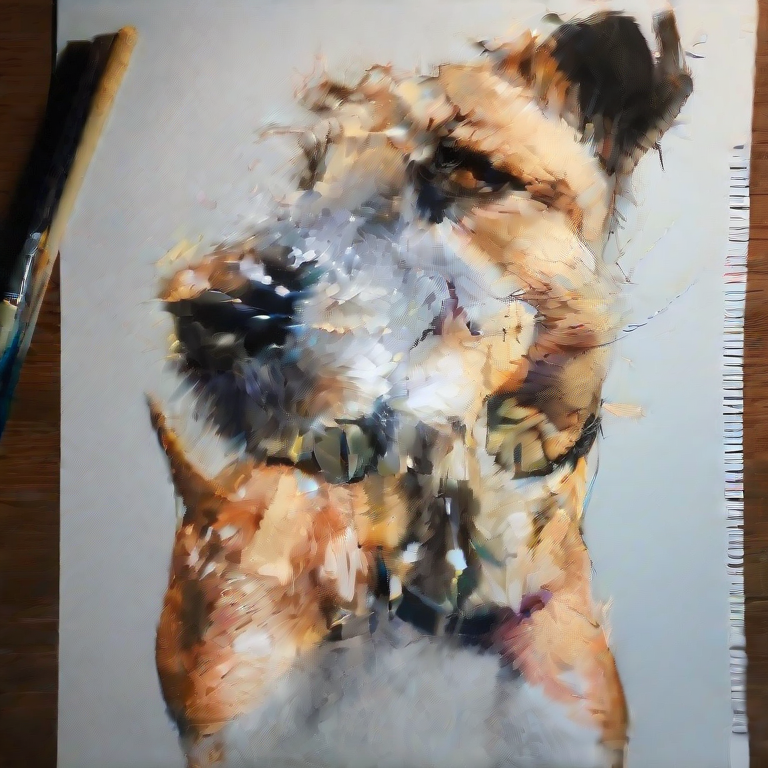

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:

import torch
import ipywidgets as widgets
from IPython.display import display, Image as IPImage, clear_output
import io
import random
from google.colab import files
from datetime import datetime

# Variable global para almacenar el archivo generado
last_generated_file = None

# Función para generar la imagen con seed aleatorio
def generate_image(pipe, prompt1, prompt2, width, height, num_images_per_prompt, num_inference_steps, guidance_scale, guidance_scale2, negative_prompt, negative_prompt2, seed):
    global last_generated_file

    # Generar un seed aleatorio si es -1
    if seed == -1:
        seed = random.randint(0, 2**32 - 1)
    generator = [torch.Generator(device="cuda").manual_seed(seed)]

    # Llamada al pipeline original
    res = call(
        pipe,
        prompt1,
        prompt2,
        width=width,
        height=height,
        num_images_per_prompt=num_images_per_prompt,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        guidance_scale2=guidance_scale2,
        negative_prompt=negative_prompt,
        negative_prompt2=negative_prompt2,
        generator=generator
    )

    # Obtener la imagen generada
    img = res.images[0]

    # Guardar la imagen como PNG
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    last_generated_file = f"generated_image_{timestamp}.png"
    img.save(last_generated_file, format="PNG")

    return img

# Función para manejar la generación con los valores de los widgets
def on_button_click_generate(b):
    global last_generated_file

    prompt1 = prompt1_widget.value
    prompt2 = prompt2_widget.value
    width = width_widget.value
    height = height_widget.value
    num_images_per_prompt = num_images_widget.value
    num_inference_steps = steps_widget.value
    guidance_scale = guidance_scale1_widget.value
    guidance_scale2 = guidance_scale2_widget.value
    negative_prompt = negative_prompt1_widget.value
    negative_prompt2 = negative_prompt2_widget.value
    seed = seed_widget.value

    # Generar la imagen
    try:
        img = generate_image(pipe, prompt1, prompt2, width, height, num_images_per_prompt, num_inference_steps, guidance_scale, guidance_scale2, negative_prompt, negative_prompt2, seed)

        # Mostrar la imagen generada
        buffered = io.BytesIO()
        img.save(buffered, format="PNG")
        img_display = IPImage(data=buffered.getvalue(), format='png')
        display(img_display)

        # Actualizar el botón de descarga
        update_download_button()
    except Exception as e:
        print(f"Error: {e}")

# Función para borrar todos los resultados generados
def on_button_click_clear(b):
    global last_generated_file
    last_generated_file = None
    clear_output(wait=True)
    display_ui()  # Volver a mostrar los widgets después de limpiar la salida

# Función para actualizar el botón de descarga
def update_download_button():
    if last_generated_file:
        download_button.description = "Descargar Última Imagen"
        download_button.button_style = 'info'
        download_button.disabled = False
    else:
        download_button.description = "No hay imagen generada"
        download_button.button_style = ''
        download_button.disabled = True

# Función para descargar la última imagen generada
def on_button_click_download(b):
    if last_generated_file:
        files.download(last_generated_file)

# Crear widgets para cada parámetro
prompt1_widget = widgets.Text(value="A beautiful young lady, painting, detailed, washed out colors, 8k", description="Prompt 1:")
prompt2_widget = widgets.Text(value="A witch, old woman, painting, detailed, washed out colors, 8k", description="Prompt 2:")
width_widget = widgets.IntSlider(value=1024, min=256, max=2048, step=64, description="Width:")
height_widget = widgets.IntSlider(value=1024, min=256, max=2048, step=64, description="Height:")
num_images_widget = widgets.IntSlider(value=1, min=1, max=4, description="Num Images:")
steps_widget = widgets.IntSlider(value=50, min=10, max=100, description="Inference Steps:")
guidance_scale1_widget = widgets.FloatSlider(value=5.0, min=1.0, max=20.0, step=0.1, description="Guidance Scale 1:")
guidance_scale2_widget = widgets.FloatSlider(value=8.0, min=1.0, max=20.0, step=0.1, description="Guidance Scale 2:")
negative_prompt1_widget = widgets.Text(value="worst quality, low quality, ugly", description="Negative Prompt 1:")
negative_prompt2_widget = widgets.Text(value="worst quality, low quality, ugly", description="Negative Prompt 2:")
seed_widget = widgets.IntText(value=-1, description="Seed (-1 = Random):")

# Botones
generate_button = widgets.Button(description="Generar Imagen", button_style='success')
generate_button.on_click(on_button_click_generate)

clear_button = widgets.Button(description="Borrar Resultados", button_style='danger')
clear_button.on_click(on_button_click_clear)

download_button = widgets.Button(description="No hay imagen generada", button_style='', disabled=True)
download_button.on_click(on_button_click_download)

# Mostrar widgets
def display_ui():
    display(
        prompt1_widget, prompt2_widget, width_widget, height_widget,
        num_images_widget, steps_widget, guidance_scale1_widget,
        guidance_scale2_widget, negative_prompt1_widget,
        negative_prompt2_widget, seed_widget, generate_button, clear_button, download_button
    )

# Mostrar interfaz inicial
display_ui()

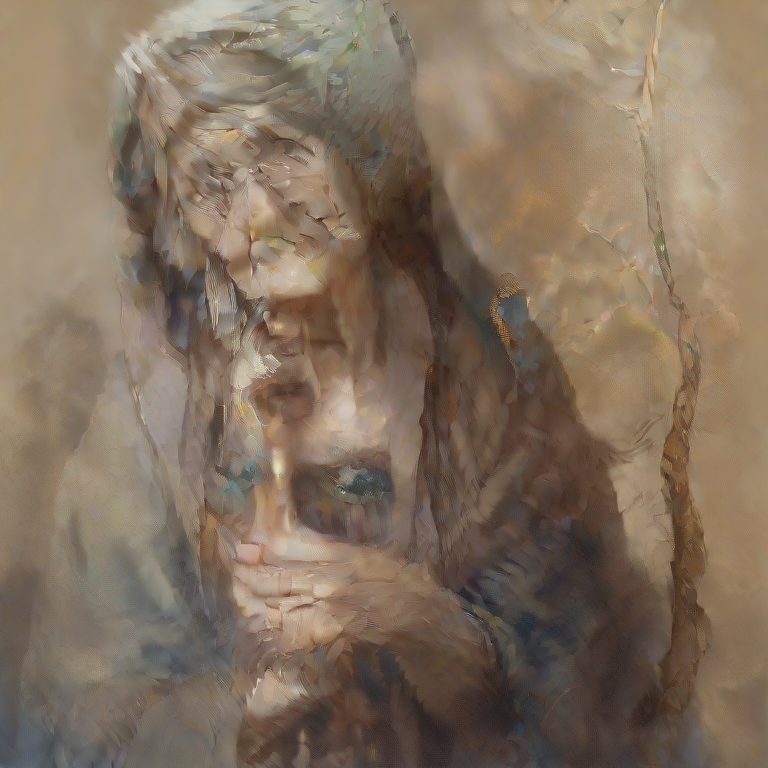

In [40]:
# Obtener la imagen generada
img = res.images[0]# Obtener la imagen generada
img = res.images[0]from PIL import Image
from IPython.display import display, Image as IPImage
import io

# Obtener la imagen generada
img = res.images[0]

# Voltear la imagen verticalmente
flipped_image = img.transpose(Image.FLIP_TOP_BOTTOM)

# Mostrar la imagen volteada
buffered = io.BytesIO()
flipped_image.save(buffered, format="PNG")
flipped_image_display = IPImage(data=buffered.getvalue(), format='png')
display(flipped_image_display)